A notebook for trying out and comparing different plot types to
use with covariance matrices.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors

#ds_2 = xr.open_dataset("data/regions_verify_202104_cov.nc")
#bio_2 = ds_2["covariance_bio"]
#anth_2 = ds_2["covariance_anth"]




In [2]:
filepath = f'/home/pietaril/Documents/data/CO2M_testdata/unc_cov_matrices/unc_cov_matrix_2025-07-02_lon10-30_lat50-70.nc'
ds = xr.open_dataset(filepath)

In [3]:
K = ds.covariance
#K = K[0:10000, 0:10000]
#K

Look at some stats about the values in the matrix

In [4]:
qs = np.quantile(K.values.flatten(), [0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99])


In [5]:
qs

array([-1.14241449e-06,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.14228555e-06])

In [6]:
abs(K.values).max()

1.2632228944910834e-05

(array([9.277e+03, 5.330e+02, 2.390e+02, 1.530e+02, 6.200e+01, 2.100e+01,
        1.000e+01, 3.000e+00, 2.000e+00, 2.000e+00]),
 array([0.00000000e+00, 1.26322289e-06, 2.52644579e-06, 3.78966868e-06,
        5.05289158e-06, 6.31611447e-06, 7.57933737e-06, 8.84256026e-06,
        1.01057832e-05, 1.13690061e-05, 1.26322289e-05]),
 <BarContainer object of 10 artists>)

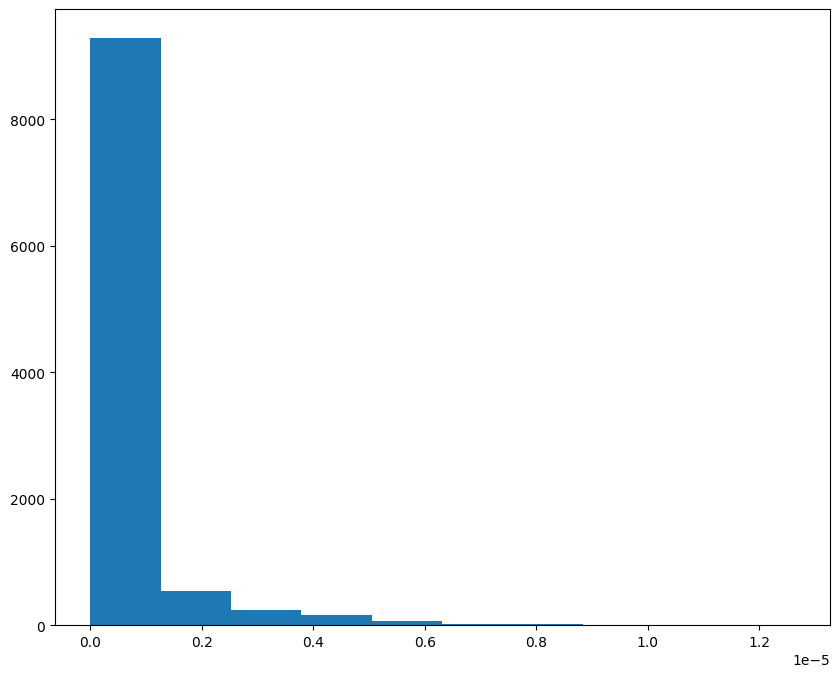

In [7]:
#variances

v = np.diag(K.values)

fig, ax = plt.subplots(figsize = (10,8))
plt.hist(v)

(array([[ 0.,  0., 28., ..., 14.,  0.,  0.],
        [ 0.,  0.,  1., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([-1.20649890e-05, -9.59526723e-06, -7.12554543e-06, -4.65582364e-06,
        -2.18610184e-06,  2.83619959e-07,  2.75334176e-06,  5.22306355e-06,
         7.69278535e-06,  1.01625071e-05,  1.26322289e-05]),
 <a list of 10302 BarContainer objects>)

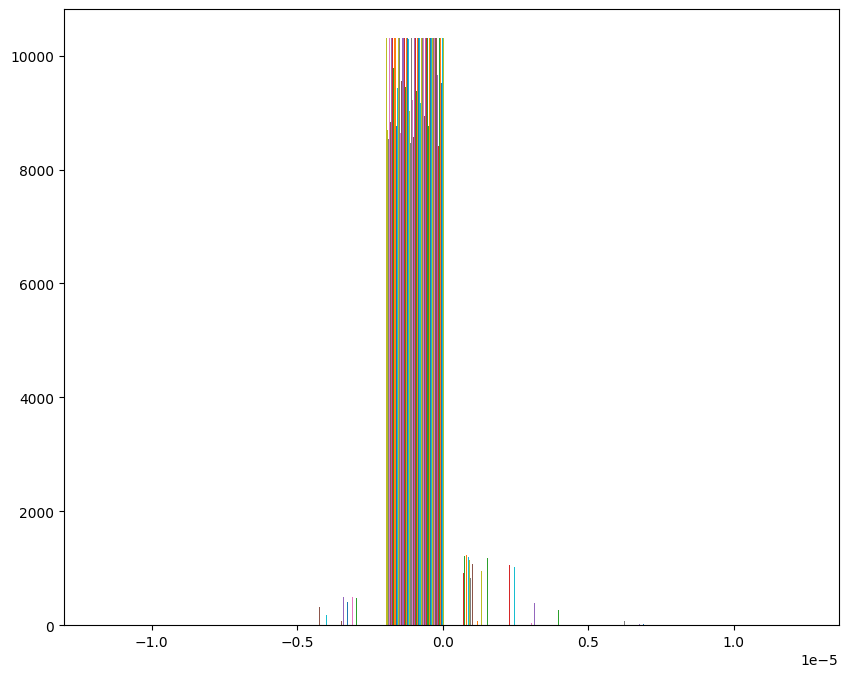

In [8]:
fig, ax = plt.subplots(figsize = (10,8))
plt.hist(K.values)

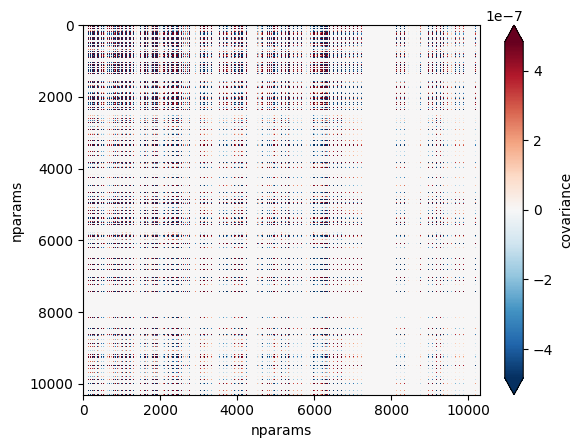

In [9]:
K.plot.imshow(origin = 'upper', robust = True)

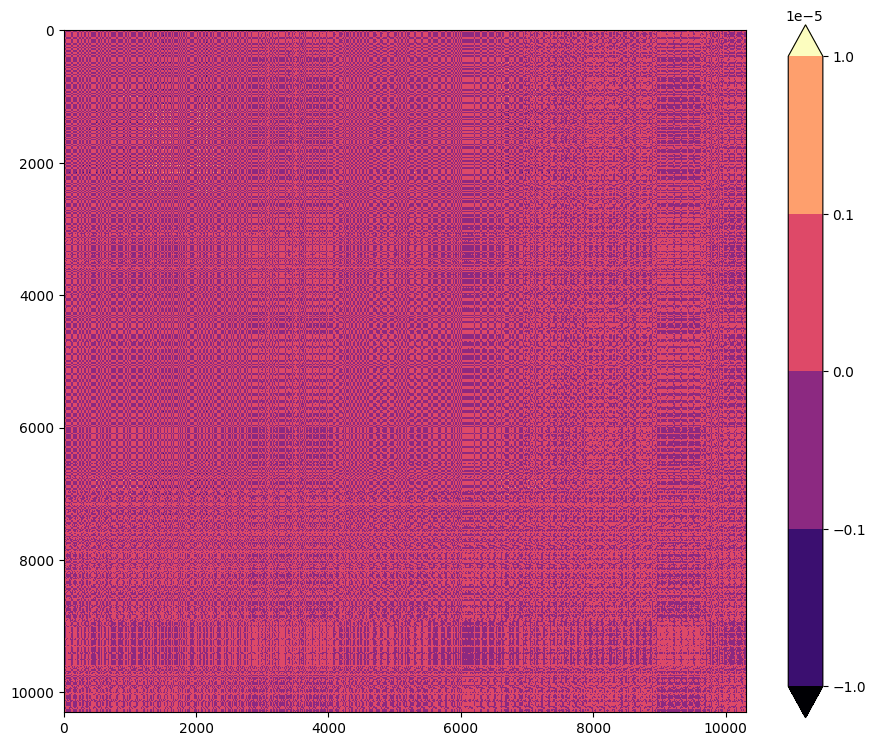

In [10]:

import matplotlib.colors as colors
bounds = np.array([-1e-5,-1e-6, 0, 1e-6, 1e-5])

fig, ax = plt.subplots( figsize = (11,9))
pcm = ax.imshow(K, norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256, extend='both'), cmap='magma')
fig.colorbar(pcm, ax=ax, orientation='vertical')
plt.show()

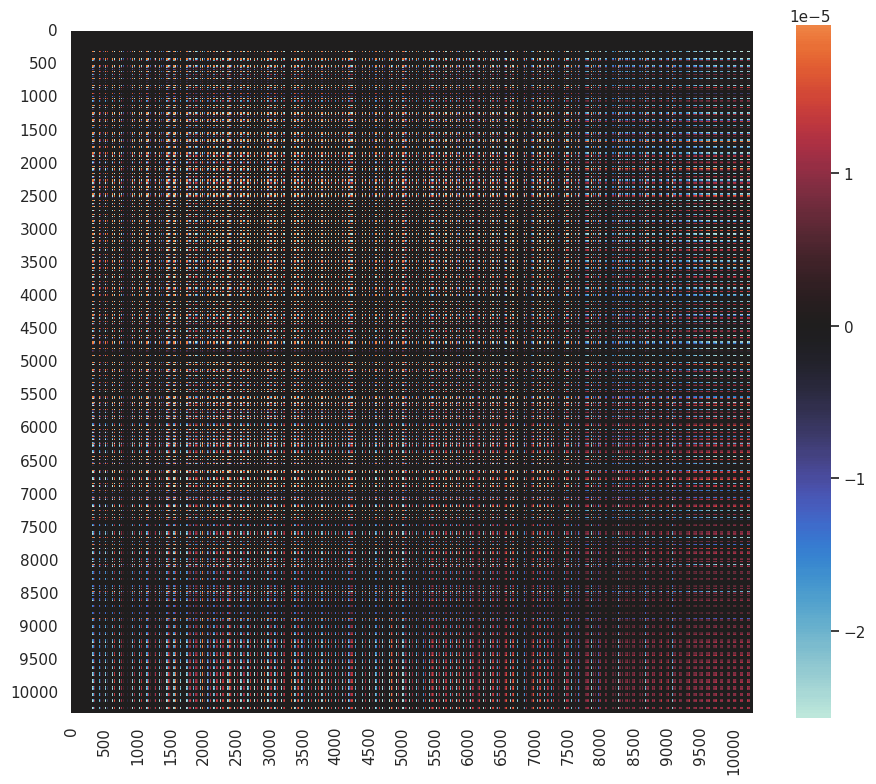

In [5]:
sns.set_theme(style="white")



f, ax = plt.subplots(figsize=(11,9))
sns.heatmap(K, xticklabels=500, yticklabels = 500, center = 0, 
        square = True, robust = True)
plt.show()

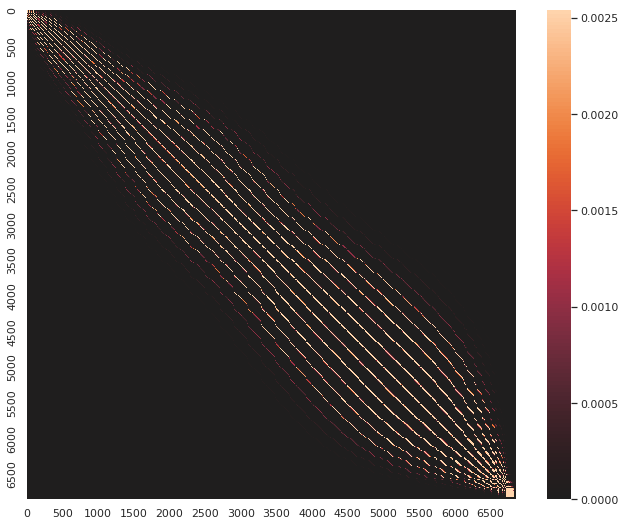

In [11]:
sns.set_theme(style="white")



f, ax = plt.subplots(figsize=(11,9))
sns.heatmap(bio_2, xticklabels=500, yticklabels = 500, center = 0, 
        square = True, robust = True)
plt.show()

AttributeError: 'AxesImage' object has no property 'robust'

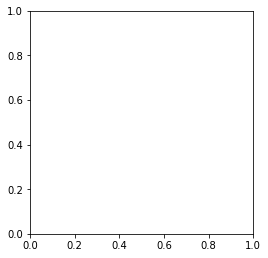

In [3]:
plt.matshow(bio_2)
plt.show()